In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
df = pd.read_excel(r'sales_data.xlsx')

In [4]:
df
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Whine   200 non-null    int64
 1   Milk    200 non-null    int64
 2   Water   200 non-null    int64
 3   Sales   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


,Whine,Milk,Water,Sales
count,200.000000,200.00000,200.000000,200.000000
mean,147.085000,23.34500,30.595000,1519.500000
std,85.854135,14.88063,21.787945,527.123368
min,1.000000,0.00000,0.000000,200.000000
25%,74.500000,10.00000,13.000000,1100.000000
50%,150.000000,23.00000,26.000000,1600.000000
75%,219.250000,37.00000,45.000000,1900.000000
max,296.000000,50.00000,114.000000,2700.000000


<AxesSubplot:xlabel='Whine', ylabel='Sales'>

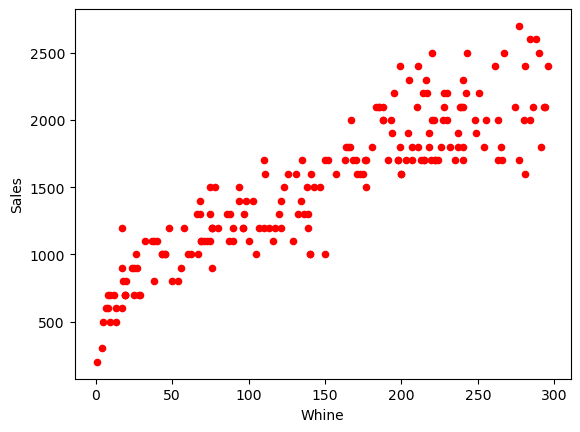

In [5]:
df.plot(kind='scatter',x='Whine',y='Sales',color="red")

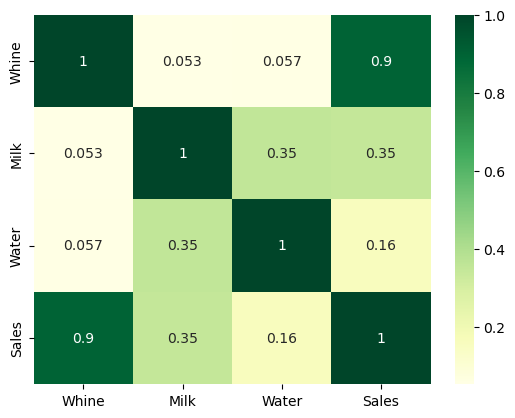

In [7]:
sns.heatmap(df.corr(), cmap="YlGn",annot=True)
plt.show()

In [9]:
X = df ['Whine']
Y = df ['Sales']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
X_train
Y_train

74     1700
3      1700
185    2300
26     1500
90     1400
       ... 
87     1600
103    2000
67     1300
24     1000
8       500
Name: Sales, Length: 140, dtype: int64

In [15]:
import statsmodels.api as sm

In [16]:
X_train_sm = sm.add_constant(X_train)

In [17]:
lr = sm.OLS(Y_train, X_train_sm).fit()

In [18]:
lr.params

const    705.667367
Whine      5.419442
dtype: float64

In [19]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     586.5
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           1.54e-51
Time:                        16:50:20   Log-Likelihood:                -967.82
No. Observations:                 140   AIC:                             1940.
Df Residuals:                     138   BIC:                             1946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        705.6674     39.014     18.087      0.000     628.524     782.811
Whine          5.4194      0.224     24.217      0.000       4.977       5.862
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.203
Skew:                          -0.004   Prob(JB):                        0.904
Kurtosis:                       2.814   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

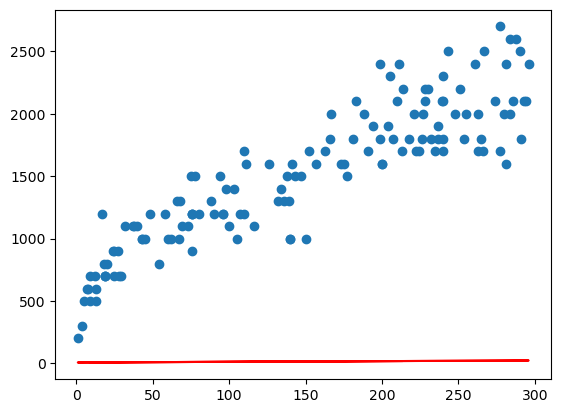

In [21]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 7.0567 + 0.0542*X_train, 'r')
plt.show()

In [22]:
y_train_pred = lr.predict(X_train_sm)

In [23]:
res = (Y_train - y_train_pred)

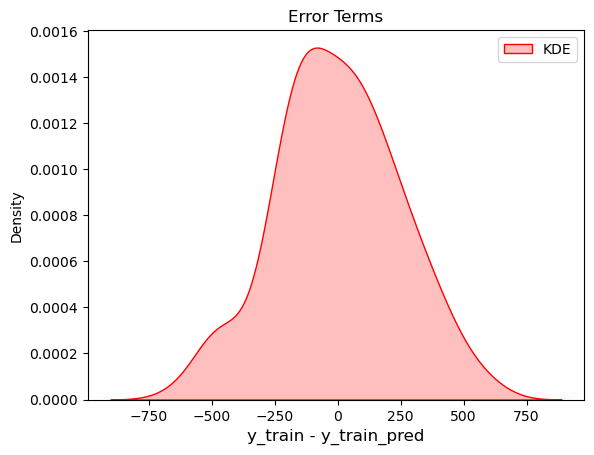

In [25]:
plt.title('Error Terms', fontsize = 12)
ax = sns.kdeplot(res,fill=True, color="r",label='KDE')
plt.title('Error Terms',fontsize = 12)
plt.xlabel('y_train - y_train_pred', fontsize = 12)
plt.legend();

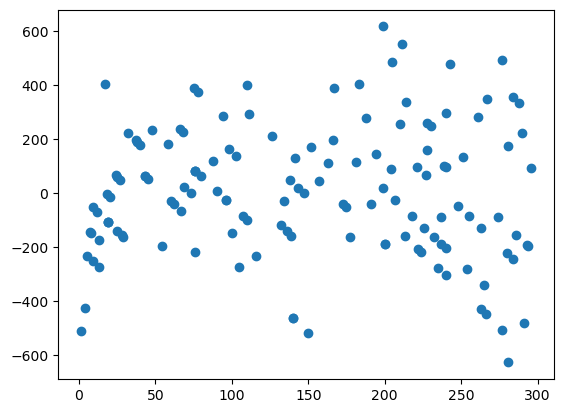

In [26]:
plt.scatter(X_train,res)
plt.show()